In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("adult.csv" )

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

#### replacing "?" value to null values 

In [7]:
df[df=='?']=np.nan

In [8]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [11]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Visulazation

<Figure size 1440x1440 with 0 Axes>

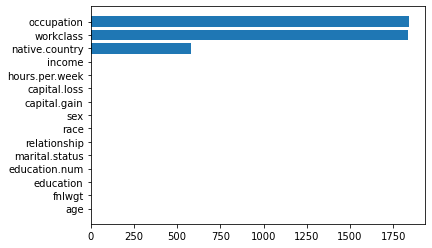

<Figure size 1440x1440 with 0 Axes>

In [12]:
temp = df.isnull().sum().sort_values()
plt.barh(temp.index,temp  )
plt.figure(figsize=(20,20))

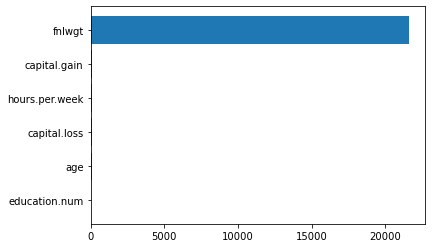

<Figure size 720x720 with 0 Axes>

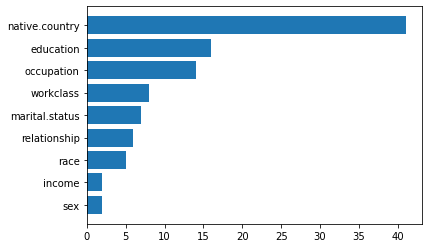

<Figure size 1440x1440 with 0 Axes>

In [13]:
temp1 = df.select_dtypes(include='number').nunique().sort_values()
plt.barh(temp1.index ,temp1  )
plt.figure(figsize=(10,10))
plt.show()
temp2 = df.select_dtypes(exclude='number').nunique().sort_values()
plt.barh(temp2.index ,temp2   )
plt.figure(figsize=(20,20))
plt.show()

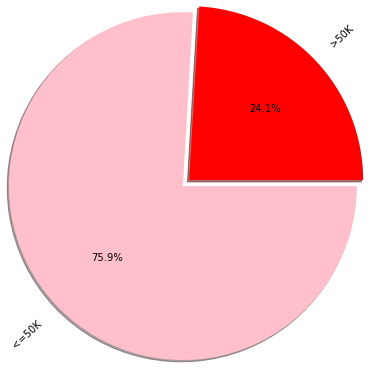

In [14]:
temp = df['income'].value_counts().sort_values()
explode =[0,0.1]
plt.pie(temp,labels=temp.index, radius=2, colors=['red','pink'], shadow=True,rotatelabels=True , autopct='%1.1f%%',explode=explode)
plt.show()


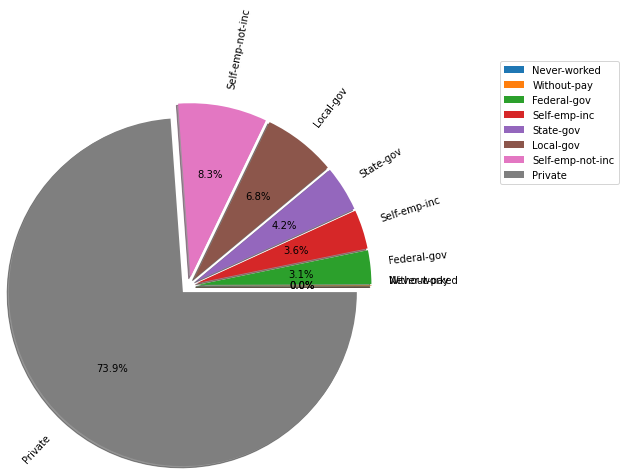

In [15]:
temp = df['workclass'].value_counts().sort_values()


explode =[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(temp, labels = temp.index , radius=2, shadow=True,rotatelabels=True , autopct='%1.1f%%', explode=explode  )
plt.legend(loc ="right" , bbox_to_anchor=(2, 1, 0.5, 0.5))

plt.show()                              


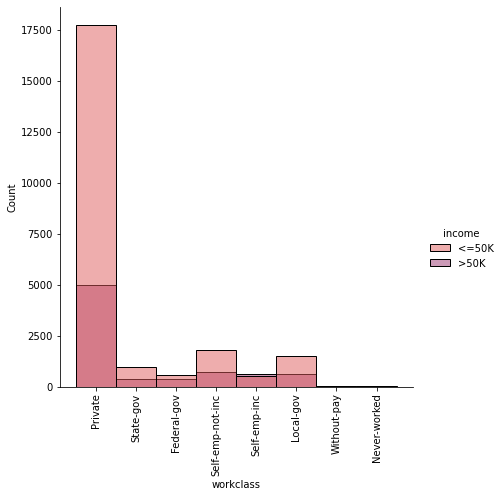

In [16]:
sns.displot(df,x='workclass' , hue='income' , palette = "flare"  , height= 6 )
plt.xticks(rotation = 90)
plt.show()

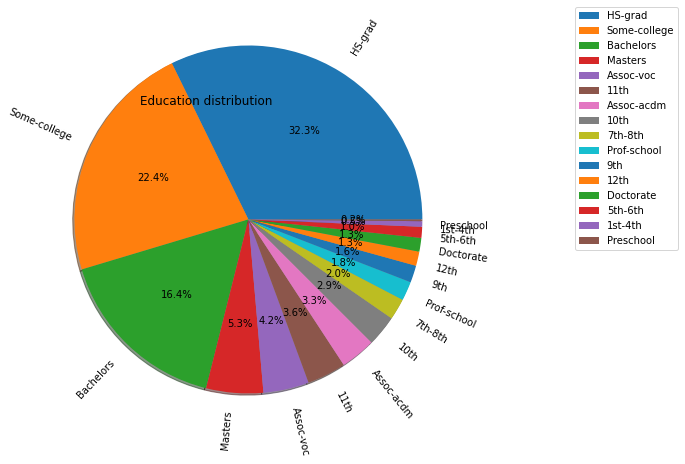

In [17]:
temp = df['education' ].value_counts()


plt.pie(temp, radius=2, labels=temp.index , shadow=True,rotatelabels=True , autopct='%1.1f%%' )
plt.legend(loc='upper right' , bbox_to_anchor=(2, 1, 0.5, 0.5))

plt.title("Education distribution" ,loc='left' )
plt.show()

### Dealing with null values

In [18]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [19]:
df=df.dropna()

In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Scaling income column

In [21]:
df['income'] = df['income'].replace('<=50K' , 0)
df['income'] = df['income'].replace('>50K' , 1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


### Checking Multicollinearity

In [23]:
corr =df.corr()

<AxesSubplot:>

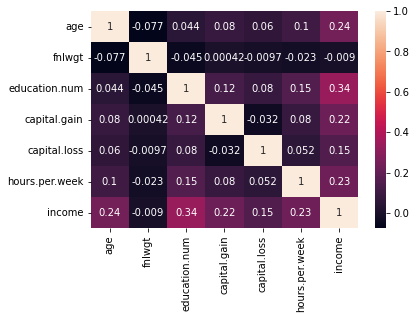

In [24]:
sns.heatmap(corr , annot=True)

### Droping column 'fnlwgt' as correlation is very low 

In [25]:
df = df.drop('fnlwgt', axis=1)


### Labeling or Scaling the data

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital.status'] = le.fit_transform(df['marital.status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native.country'] = le.fit_transform(df['native.country'])

In [29]:
X = df.drop('income' , axis =1 )
y = df['income']

### Spliting the data in  Train and Test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train , X_test ,  y_train , y_test = train_test_split(X, y ,test_size=0.6 ,random_state=50)

### Logistic Reggression Approach

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lrclassifier = LogisticRegression(random_state = 0)
lrclassifier.fit(X_train, y_train)
y_pred = lrclassifier.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7998121339374517


### RandomForest  Approach

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfclassifier = RandomForestClassifier(random_state = 0)
rfclassifier.fit(X_train, y_train)
y_pred = rfclassifier.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8447342247762184


### Conclusion

The performances of the models are compared on the basis of classification report.
The RandomForest Classification comes to 
be the best performing algorithm above all other models 
with an accuracy of 84.% and over all generalizing well. 